# MODELO DE APRENDIZAJE AUTOMÁTICO 

## RECONOCIMIENTO DE SEÑALES DE TRÁFICO UTILIZANDO 

## REDES NEURONALES CONVOLUCIONALES
---

![imagen](../resources/german_trafic_.png)


### Descripción del Proyecto:

Las señales de tráfico han sido diseñadas para ser fácilmente reconocibles por el cerebro humano, sin embargo para los sistemas informáticos esta clasificación sigue presentando algunas limitaciones en el reconocimiento de sus patrones.

Este proyecto consiste en la creación de un modelo predictivo de Machine Learning para el reconocimiento automático de señales de tráfico.

Para nuestro objetivo vamos a comparar dos modelos de redes neuronales convolucionales (CNN),una de nuestra configuración y otra red pre-entrenada; cambiaremos sus hiperparámetros para resolver su complejidad y hacer la comparación de sus resultados y el margen. de error. que cada uno de ellos nos ofrece.

Para este estudio, utilizaremos el conjunto de datos recopilados en tiempo real durante más de 10 horas de trabajo por el equipo de Visión de Grupo del Benchmark de Reconocimiento de Señales de Tráfico de Alemania (GTSRB).

Finalmente nos quedaremos con el mejor resultado de predicción que se nos ofrezca y crearemos un detector de señales de tráfico en imágenes basado en Deep Learning.

#### Conjunto de datos : 

+ Problema de clasificación de una sola imagen y varias clases
+ Más de 40 clases
+ Más de 50.000 imágenes en total
+ Base de datos grande y realista

#### Estructura de los datos:

+ El conjunto de datos  de entrenamiento está estructurado de la siguiente manera:
+ Un directorio por clase
+ Cada directorio contiene un archivo CSV con anotaciones ("GT- <ClassID> .csv") y sus imágenes de entrenamiento
+ Las imágenes de entrenamiento están agrupadas por carpetas
+ Cada carpeta contiene 30 imágenes de una única señal de tráfico real.

#### Formato de Imágenes

+ Las imágenes contienen una señal de tráfico cada una.
+ Las imágenes contienen un borde del 10% alrededor de la señal de tráfico real (al menos 5 píxeles) para permitir enfoques basados ​​en bordes.
+ Las imágenes se almacenan en formato PPM (Portable Pixmap, P6)
+ Los tamaños de imagen varían entre 15x15 y 250x250 píxeles
+ Las imágenes no son necesariamente cuadradas.
+ La señal de tráfico real no está necesariamente centrada dentro de la imagen.

#### Palabras clave:
+   Visión artificial
+   Deep Learning,
+   Entrenamiento supervisado profundo
+   Redes Neuronales


### Breve Introducción: Deep Learning

El Aprendizaje Profundo es un conjunto de algoritmos de Aprendizaje Automático que se 
centran en emular el enfoque de aprendizaje de los seres humanos, pudiendo modelar 
abstracciones de alto nivel de los datos utilizando arquitecturas computacionales que admiten 
operaciones no lineales. 

La arquitectura computacional más usada para el Deep Learning es la Red Neuronal. Estas redes 
neuronales están formadas por múltiples capas. Las neuronas de una capa están conectadas con 
las adyacentes por medio de conexiones, las cuales tienen asociado un peso.

### Red Neuronal Artificial

![imagen](../resources/red_neuronal_artificial.png)

### La Red Neuronal Convolucional
La Red Neuronal Convolucional (Convolutional Neuronal Network, CNN o ConvNet) es una clase
de red de aprendizaje profundo, aplicada en el análisis visual de imágenes. Las principales 
aplicaciones que tiene son reconocimiento de imágenes y vídeos, clasificación de imágenes y 
procesamiento del lenguaje natural

![imagen](../resources/cnn.jpg)


Este tipo de Red Neuronal, por medio de entrenamiento y aprendizaje supervisado, intenta 
imitar cómo funciona las neuronas en la corteza visual de nuestro cerebro. Por lo tanto, estas 
tienen muchas capas ocultas especializadas, las cuales siguen una jerarquía. Las primeras capas 
irán detectando líneas y curvas, las siguientes irán cada vez abstrayéndose más hasta poder 
identificar formas complejas. 

A continuación, vamos a mostrar las formas que sería capaz de reconocer cada capa de una CNN.
Realmente, son las formas que hace que una neurona de esa capa maximice su activación.

![imagen](../resources/ejemplo_imagen.png)



#### CLASIFICACIÓN DE SEÑALES DE TRÁFICO 

Vamos a desarrollar y comparar algoritmos de clasificación de señales de tráfico. 
En primer lugar, mostraremos el conjunto de datos al que nos enfrentamos. A continuación, 
desarrollaremos los algoritmos utilizados y qué resultados han obtenido en el problema.

#### Conjunto de datos:

El conjunto de datos (dataset) que se va a usar para entrenar a los clasificadores es GTSRB (The 
German Traffic Sign Recognition Benchmark).
Está formado por 39 209 imágenes en el conjunto de entrenamiento y por 12 631 en el conjunto 
de pruebas (test). 

### Data Analysis

In [1]:
#Importamos librerias necesarias 
import pandas as pd
import numpy as np 

#modulos propios 
from utils import folders_tb as f
from utils import models as mo
from utils import visualization_tb as vt

#visualización de imágenes
from matplotlib.image import imread
import matplotlib.pyplot as plt
import seaborn as sns

#path
import os
from os import listdir
from os.path import isfile, join

#keras
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.optimizers import *
from tensorflow import keras

#Usaremos la libreria Open Cv para el conjunto de test
import cv2 as cv
from PIL import Image

import warnings
warnings.filterwarnings('ignore')


Como podemos comprobar en cada csv correspondiente Test/Train/Meta en nuestros conjuntos de datos y entrenamiento, se puede ver que las columnas contienen como valores, las rutas hacia cada una de las imágenes, las clases a las que pertenecen, las medidas ancho,por alto en píxeles  y otros correspondiente a cada imágen a analizar.

In [2]:
# Este es nuestro conjunto de entrenamiento
training_set = pd.read_csv(f.curr_path() + os.sep + 'data' + os.sep + "Train.csv")
training_set.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [3]:
#conjunto de test

test_set = pd.read_csv(f.curr_path() + os.sep + 'data' + os.sep + "Test.csv")
test_set.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [4]:
#conjunto meta
meta_set = pd.read_csv(f.curr_path() + os.sep + 'data' + os.sep + "Meta.csv")
meta_set.head()

,Path,ClassId,ShapeId,ColorId,SignId
0,Meta/27.png,27,0,0,1.32
1,Meta/0.png,0,1,0,3.29
2,Meta/1.png,1,1,0,3.29
3,Meta/10.png,10,1,0,3.27
4,Meta/11.png,11,0,0,1.22


### Visualización de las diferentes Clases en los conjuntos de Test y de Train

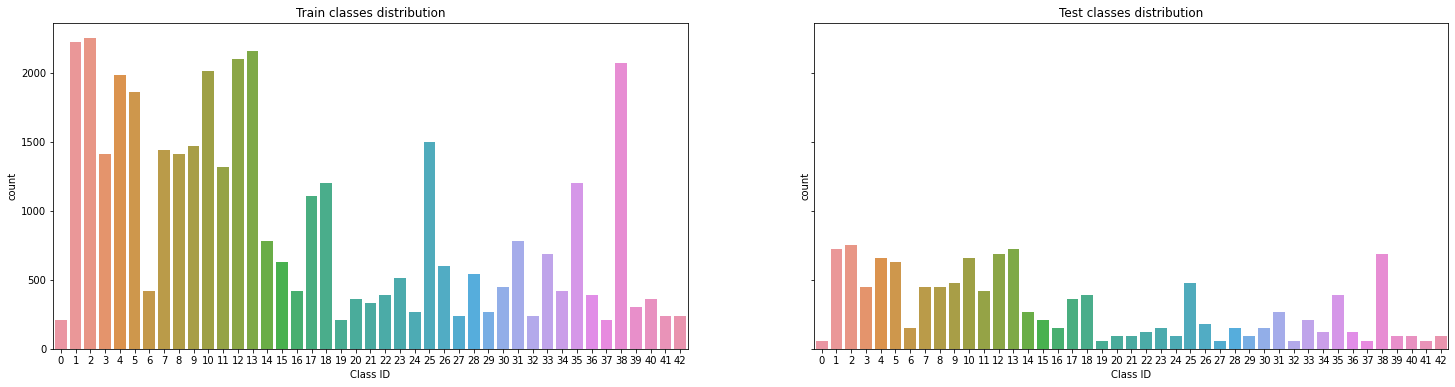

In [5]:
vt.distribucion_clases(training_set,test_set)

### Visualización de las diferentes medidas de las imágenes

El conjunto de datos contiene miles de imágenes. Las imágenes no tienen la misma resolución. Algunos de ellos son grandes, otros son pequeños. De alguna manera deberíamos elegir la resolución apropiada de las muestras. La mejor manera de visualizar la correlación de ancho y alto: mediante el trazado multivariante.

Como podemos ver a continuación, la mayoría de las imágenes son rectangulares (se puede probar aplicando regresión lineal en la resolución de las muestras). La mayoría de las muestras tienen unos 35x35 píxeles. Y solo unas pocas muestras tienen una gran resolución como 100x100 píxeles.

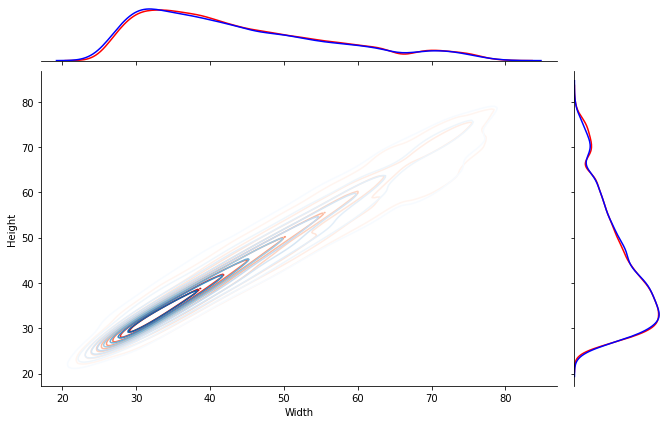

In [9]:
trainDfDpiSubset = training_set[(training_set.Width < 80) & (training_set.Height < 80)];
testDfDpiSubset = test_set[(test_set.Width < 80) & (test_set.Height < 80)];

g = sns.JointGrid(x="Width", y="Height", data=trainDfDpiSubset)
sns.kdeplot(trainDfDpiSubset.Width, trainDfDpiSubset.Height, cmap="Reds",
        shade=False, shade_lowest=False, ax=g.ax_joint)
sns.kdeplot(testDfDpiSubset.Width, testDfDpiSubset.Height, cmap="Blues",
        shade=False, shade_lowest=False, ax=g.ax_joint)
sns.distplot(trainDfDpiSubset.Width, kde=True, hist=False, color="r", ax=g.ax_marg_x, label='Train distribution')
sns.distplot(testDfDpiSubset.Width, kde=True, hist=False, color="b", ax=g.ax_marg_x, label='Test distribution')
sns.distplot(trainDfDpiSubset.Width, kde=True, hist=False, color="r", ax=g.ax_marg_y, vertical=True)
sns.distplot(testDfDpiSubset.Height, kde=True, hist=False, color="b", ax=g.ax_marg_y, vertical=True)
g.fig.set_figwidth(10)
g.fig.set_figheight(6)
plt.show();

In [6]:
data = []
labels = []
classes = 43
cur_path = f.curr_path() + os.sep + 'data' + os.sep + "Train"
cur_path

'c:\\Users\\Karina\\Desktop\\data_science_apr_2021\\machine_learning_project\\project\\data\\Train'

In [7]:
for i in os.listdir(cur_path):
    dir = cur_path + '/' + i
    for j in os.listdir(dir):
        img_path = dir+'/'+j
        img = cv2.imread(img_path,-1)
        img = cv2.resize(img, (30,30), interpolation = cv2.INTER_NEAREST)
        data.append(img)
        labels.append(i)
        
x_train = np.array(data)
x_train = x_train / 255
y_train = np.array(labels).astype(np.float)

NameError: name 'cv2' is not defined

In [4]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(31367, 30, 30, 3) (31367,)
(7842, 30, 30, 3) (7842,)


Text(0, 0.5, 'Number of images')

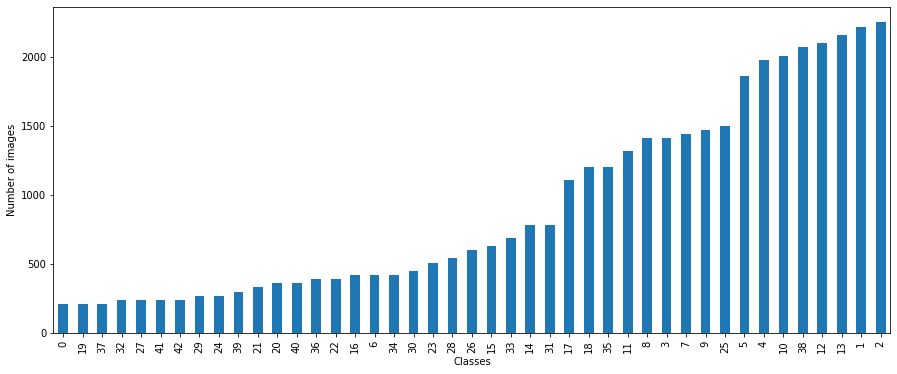

In [5]:
# number of images in each class
data_dic = {}
for folder in os.listdir(cur_path):
    data_dic[folder] = len(os.listdir(cur_path + '/' + folder))

data_df= pd.Series(data_dic)
plt.figure(figsize = (15, 6))
data_df.sort_values().plot(kind = 'bar')
plt.xlabel('Classes')
plt.ylabel('Number of images')

In [6]:
#model = mo.my_best_model()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        4864      
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        102464    
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 128)         204928    
_________________________________________________________________
batch_normalization_2 (Batch (None, 9, 9, 128)         512       
_________________________________________________________________
dropout (Dropout)            (None, 9, 9, 128)         0

In [7]:
callback = EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',factor=1e-1, patience=8, verbose=1, min_lr = 2e-6)
opt = Adam(learning_rate = 1e-3)

In [8]:
'''model.compile(optimizer = opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])'''

In [9]:
'''history = model.fit(train_ds,  batch_size = 128, 
         epochs=10, validation_data = val_ds, verbose=1,callbacks=[callback, reduce_lr])'''

Epoch 1/10
246/246 [==============================] - 57s 228ms/step - loss: 9.4299 - accuracy: 0.6887 - val_loss: 8.0120 - val_accuracy: 0.3504
Epoch 2/10
246/246 [==============================] - 59s 239ms/step - loss: 4.0817 - accuracy: 0.9026 - val_loss: 3.9960 - val_accuracy: 0.6769
Epoch 3/10
246/246 [==============================] - 59s 239ms/step - loss: 2.5038 - accuracy: 0.9246 - val_loss: 2.0628 - val_accuracy: 0.9660
Epoch 4/10
246/246 [==============================] - 59s 240ms/step - loss: 1.9509 - accuracy: 0.9377 - val_loss: 1.6707 - val_accuracy: 0.9686
Epoch 5/10
246/246 [==============================] - 54s 219ms/step - loss: 1.6744 - accuracy: 0.9449 - val_loss: 1.4558 - val_accuracy: 0.9527
Epoch 6/10
246/246 [==============================] - 54s 219ms/step - loss: 1.5217 - accuracy: 0.9474 - val_loss: 1.4555 - val_accuracy: 0.9621
Epoch 7/10
246/246 [==============================] - 54s 219ms/step - loss: 1.5020 - accuracy: 0.9460 - val_loss: 1.4275 - val_ac

In [10]:
#model.save('../my_model_pruebaquinta.h5')

cur_path = f.curr_path() + os.sep + 'data' + os.sep + "Train"
test = pd.read_csv(f.curr_path() + os.sep + 'data' + os.sep + "Test.csv")
y_test = test["ClassId"].values
imgs = test["Path"].values
test_path = f.curr_path() + os.sep + 'data' 
data_test =[]
for img in imgs:
    image = cv2.imread(f.curr_path() + os.sep + 'data' +os.sep +img)
    image_fromarray = Image.fromarray(image, 'RGB')
    resize_image = image_fromarray.resize((30, 30))
    data_test.append(np.array( resize_image ))


In [12]:

x_test = np.array(data_test)
x_test = x_test/255
y_test = test["ClassId"].values


In [13]:
print(x_test.shape)
print(y_test.shape)

(12630, 30, 30, 3)
(12630,)


In [14]:
nuevo_model = keras.models.load_model('../my_model_pruebaquinta.h5')

In [11]:
nuevo_model.evaluate(x_test, y_test)

KeyboardInterrupt: 